In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplotlib
%matplotlib inline

In [32]:
apps= pd.read_csv('/content/googleplaystore.csv')

In [33]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [34]:
apps.shape

(10841, 13)

In [35]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [36]:
from dateutil import parser
s='April 11, 2021'
p=parser.parse(s)
p=p.strftime('%d/%m/%Y')
print(p)
print(type(p))

11/04/2021
<class 'str'>


In [37]:
def Mapper(s):
  try:
    date = parser.parse(s)
    date = date.strftime('%d/%m/%Y')
    return date
  except:
    return np.nan

apps['Last Updated'] = apps['Last Updated'].map(Mapper)

In [38]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [39]:
apps=apps.dropna(how='any')

In [40]:
apps['Last Updated']=pd.to_datetime(apps['Last Updated'])
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-07-01,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-01-08,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-08-06,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [41]:
size_list = apps['Size'].to_list()
sizes=[]
def extractingSize(item):
  count=0
  try:
    s=item[:len(item)-1]
    sizes.append(float(s))
    return float(s)
  except:
    count=count+1
    pass
print(size_list[:6])
apps['Size'] = apps['Size'].map(extractingSize)



['19M', '14M', '8.7M', '25M', '2.8M', '5.6M']


In [42]:
9630 - len(sizes)

1907

In [43]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-07-01,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-01-08,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-08-06,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [44]:
apps['Size'].astype('float64')
apps['Size'].isnull().sum()

1637

In [45]:
apps = apps.dropna(how='any')


In [46]:
s='4.0.3'.split('.')
print(s[0]+'.'+s[1]+s[2])

4.03


In [47]:
print(len(apps['Type'].value_counts()))
apps['Type'].value_counts()

2


Free    7146
Paid     577
Name: Type, dtype: int64

In [49]:
print(len(apps['Content Rating'].value_counts()))
apps['Content Rating'].value_counts()

6


Everyone           6166
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [50]:
print(len(apps['Category'].value_counts()))
apps['Category'].value_counts()

33


FAMILY                 1616
GAME                    974
TOOLS                   633
MEDICAL                 324
LIFESTYLE               280
PERSONALIZATION         278
FINANCE                 266
SPORTS                  247
BUSINESS                246
PHOTOGRAPHY             236
PRODUCTIVITY            235
HEALTH_AND_FITNESS      223
COMMUNICATION           211
SHOPPING                179
SOCIAL                  177
DATING                  173
NEWS_AND_MAGAZINES      169
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
VIDEO_PLAYERS           116
EDUCATION               110
MAPS_AND_NAVIGATION      95
ENTERTAINMENT            90
FOOD_AND_DRINK           84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [51]:
print(len(apps['Genres'].value_counts()))
apps['Genres'].value_counts()

112


Tools                                    633
Entertainment                            448
Education                                417
Medical                                  324
Action                                   322
                                        ... 
Racing;Pretend Play                        1
Board;Pretend Play                         1
Video Players & Editors;Music & Video      1
Music & Audio;Music & Video                1
Strategy;Creativity                        1
Name: Genres, Length: 112, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(apps['Category'])
apps['Category'] = le.transform(apps['Category'])



In [55]:
print(le.classes_)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']


In [56]:
le.fit(apps['Content Rating'])
apps['Content Rating'] = le.transform(apps['Content Rating'])

print(le.classes_)

['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']


In [57]:
apps['Type'] = apps['Type'].map(lambda x:1 if x=='Paid' else 0)

In [58]:
apps = apps.drop(['App' , 'Genres' , 'Current Ver'] , axis=1)

apps.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,0,4.1,159,19.0,"10,000+",0,0,1,2018-07-01,4.0.3 and up
1,0,3.9,967,14.0,"500,000+",0,0,1,2018-01-15,4.0.3 and up
2,0,4.7,87510,8.7,"5,000,000+",0,0,1,2018-01-08,4.0.3 and up
3,0,4.5,215644,25.0,"50,000,000+",0,0,4,2018-08-06,4.2 and up
4,0,4.3,967,2.8,"100,000+",0,0,1,2018-06-20,4.4 and up


In [60]:
install_list = apps['Installs'].to_list()
Installs=[]

def extractingInstalls(x):
  for item in x:
    if not item.startswith('Varies'):
      s=str(item[:len(item)-1])
      s=s.replace(",","")
      Installs.append(float(s))
    else:
      Installs.append(1000.0)

extractingInstalls(install_list)
print(Installs[:6])
apps['Installs'] = Installs

[10000.0, 500000.0, 5000000.0, 50000000.0, 100000.0, 50000.0]


In [61]:
apps['Reviews'] = apps['Reviews'].map(lambda x:float(x))

In [62]:
import datetime as dt

apps['month'] = apps['Last Updated'].dt.month
apps['day'] = apps['Last Updated'].dt.day
apps['Year'] = apps['Last Updated'].dt.year

In [63]:
var_list = apps['Android Ver'].to_list()
var=[]
def extractingAndroid(x):
  for item in x:
    if not item.startswith('Varies'):
      s=str(item[:3])
      var.append(float(s))
    else:
      var.append(4.4)

extractingAndroid(var_list)
print(var_list[:6])
apps['Android Ver']=var

['4.0.3 and up', '4.0.3 and up', '4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up']


In [64]:
price_list = apps['Price'].to_list()
prices=[]

def extractingPrices(x):
  for item in x:
    if item!=0:
      s = item.replace('$',"")
      prices.append(float(s))
    else:
      prices.append(0.0) 
extractingPrices(apps['Price'])
print(price_list[:6])
apps['Price']=prices

['0', '0', '0', '0', '0', '0']


In [65]:
apps.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Android Ver       0
month             0
day               0
Year              0
dtype: int64

In [66]:
apps.head(3)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,month,day,Year
0,0,4.1,159.0,19.0,10000.0,0,0.0,1,2018-07-01,4.0,7,1,2018
1,0,3.9,967.0,14.0,500000.0,0,0.0,1,2018-01-15,4.0,1,15,2018
2,0,4.7,87510.0,8.7,5000000.0,0,0.0,1,2018-01-08,4.0,1,8,2018


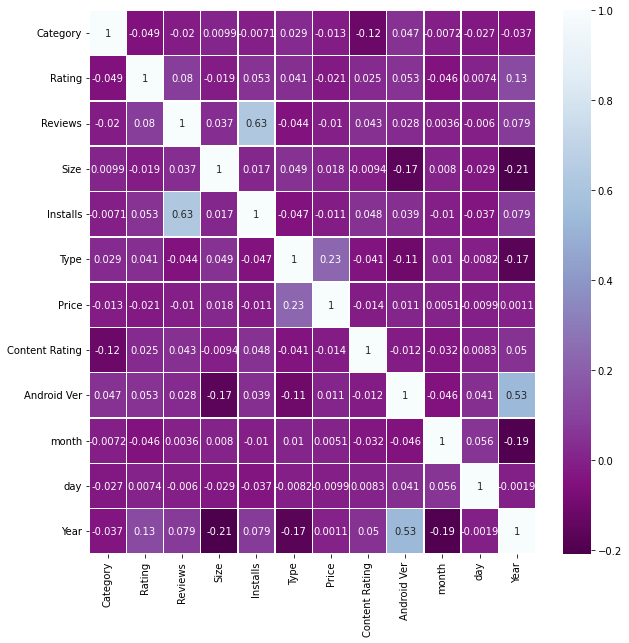

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(apps.corr(),annot=True,cmap='BuPu_r', linewidths=.5)
